<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Process-text-data-on-Twitter-data" data-toc-modified-id="Python-Process-text-data-on-Twitter-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Process text data on Twitter data</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-reivew" data-toc-modified-id="Data-reivew-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data reivew</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Drop-useless-columns" data-toc-modified-id="Drop-useless-columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Drop useless columns</a></span></li><li><span><a href="#Extract-text-data" data-toc-modified-id="Extract-text-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extract text data</a></span></li><li><span><a href="#text-pipline" data-toc-modified-id="text-pipline-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>text pipline</a></span></li><li><span><a href="#cleaned-text-sample" data-toc-modified-id="cleaned-text-sample-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>cleaned text sample</a></span></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Vectorization</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>CountVectorizer</a></span></li><li><span><a href="#Word-count" data-toc-modified-id="Word-count-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Word count</a></span></li></ul></li></ul></li><li><span><a href="#Wordcould" data-toc-modified-id="Wordcould-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wordcould</a></span></li></ul></div>

# Python Process text data on Twitter data

# Introduction

Author: Cholian Li

Date: 2021/09/28

Data sources: data_twitter.csv

# Data reivew

In [1]:
import pandas as pd

In [2]:
ori_data = pd.read_csv('data_twitter.csv',index_col=0)

In [3]:
ori_data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,915225464230334464,1436479568483954688,1631318392,EnrichedFeed,"Bitcoin, Ethereum and Solana Prices Slip�<U+00...",bFol05,284,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...
1,915225464230334464,1436478311711051791,1631318092,EnrichedFeed,C98/USD price expected to dip to $3.5 in the n...,bFol05,271,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...
2,915225464230334464,1436468760475574316,1631315815,EnrichedFeed,Aave founder sells �<U+0080><U+0098>Yield�<U+0...,bFol05,274,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...
3,915225464230334464,1436469517174116364,1631315995,EnrichedFeed,Is the Crypto Market Correction Good or Bad fo...,bFol05,271,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...
4,915225464230334464,1436478217444069379,1631318070,EnrichedFeed,Undaunted by Bitcoin �<U+0080><U+0098>flash cr...,bFol05,277,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...


In [4]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40120 entries, 0 to 40119
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  40120 non-null  int64  
 1   status_id                40120 non-null  int64  
 2   created_at               40120 non-null  int64  
 3   screen_name              40120 non-null  object 
 4   text                     40120 non-null  object 
 5   source                   40120 non-null  object 
 6   display_text_width       40120 non-null  int64  
 7   reply_to_status_id       11025 non-null  float64
 8   reply_to_user_id         11986 non-null  float64
 9   reply_to_screen_name     11986 non-null  object 
 10  is_quote                 40120 non-null  bool   
 11  is_retweet               40120 non-null  bool   
 12  favorite_count           40120 non-null  int64  
 13  retweet_count            40120 non-null  int64  
 14  quote_count           

# Data cleaning

## Drop useless columns

In [5]:
useful_cols = ['created_at','text','hashtags','lang','location','description']

data = ori_data[useful_cols].copy()

data.head()

,created_at,text,hashtags,lang,location,description
0,1631318392,"Bitcoin, Ethereum and Solana Prices Slip�<U+00...","c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",en,United States,"Crypto Research and investing news\r\n$ada, $b..."
1,1631318092,C98/USD price expected to dip to $3.5 in the n...,"c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",en,United States,"Crypto Research and investing news\r\n$ada, $b..."
2,1631315815,Aave founder sells �<U+0080><U+0098>Yield�<U+0...,"c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",da,United States,"Crypto Research and investing news\r\n$ada, $b..."
3,1631315995,Is the Crypto Market Correction Good or Bad fo...,"c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",en,United States,"Crypto Research and investing news\r\n$ada, $b..."
4,1631318070,Undaunted by Bitcoin �<U+0080><U+0098>flash cr...,"c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",en,United States,"Crypto Research and investing news\r\n$ada, $b..."


## Extract text data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40120 entries, 0 to 40119
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   40120 non-null  int64 
 1   text         40120 non-null  object
 2   hashtags     40120 non-null  object
 3   lang         40120 non-null  object
 4   location     19429 non-null  object
 5   description  33578 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [7]:
data['created_at'] = pd.to_datetime(data['created_at'],unit='s')
data = data.sort_values(by='created_at').reset_index(drop=True)
data.head()

,created_at,text,hashtags,lang,location,description
0,2021-09-06 13:27:41,Nice! My #Trading Bot 2 just sold $FET/ $USDT ...,"c(""Trading"", ""binance"", ""ad"", ""ad"", ""FET"", ""Cr...",en,Sachsen,Real Live Trades
1,2021-09-06 13:27:44,@bailsbeezbail @florsbeny @SolarMoonToken @Sol...,"c(""cryptocurrency"", ""solarmoon"", ""greencrypto"")",en,NaN,SOLARMOON FOR LIFE
2,2021-09-06 13:27:49,@chainlink ( $LINK): How long will it take to ...,"c(""cryptocurrency"", ""CryptoNews"", ""cryptotradi...",en,NaN,CryptoNewsZ is a news publication media that p...
3,2021-09-06 13:27:49,"@elonmusk You are right sir. Indeed, Time is t...","c(""elonmusk"", ""cryptocurrency"", ""bsc"")",en,<U+0001F4CD>Republic of the Philippines,She/ Her � Filipina � Animal Lover � real acco...
4,2021-09-06 13:27:56,#IOTA #MIOTA #IOTAstrong #cryptonews #crypto #...,"c(""IOTA"", ""MIOTA"", ""IOTAstrong"", ""cryptonews"",...",und,Global,News about IOTA - The dlt that is being built ...


Since here we just concerned about what happened on Sept. 7, we just extract all the text on sept 6, spet 7 two days

In [8]:
text_data = data[(data['created_at']>= '2021-09-06') & (data['created_at']<= '2021-09-07')]['text']

In [9]:
text_data

0       Nice! My #Trading Bot 2 just sold $FET/ $USDT ...
1       @bailsbeezbail @florsbeny @SolarMoonToken @Sol...
2       @chainlink ( $LINK): How long will it take to ...
3       @elonmusk You are right sir. Indeed, Time is t...
4       #IOTA #MIOTA #IOTAstrong #cryptonews #crypto #...
                              ...                        
9943    Best #cryptocurrency risk-adjusted returns in ...
9944    TerryHarry found #bitcoin in a User vault at t...
9945    The mining project  from #_Burency will be a p...
9946    My Crypto Strategy on ICONOMI just outperforme...
9947    Keeping up with the speed of innovation in cry...
Name: text, Length: 9948, dtype: object

## text pipline

Create a pipeline to help filter the trash words or useless words in the doc

In [10]:
import spacy

pipeline = spacy.load('en_core_web_sm')

import re
from spacy.language import Language

# http://emailregex.com/
email_re = r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

# replace = [ (pattern-to-replace, replacement),  ...]
replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (email_re, "email"),            # Matches emails
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "numbr"),              # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/]", " "),   # Punctuation and other junk
    (r"\s+", " "),                   # Stips extra whitespace
    (r"\W"," ")                      # Matches any character that is not a word character (alphanumeric & underscore)
]

train_text = text_data

for repl in replace:
    train_text = [re.sub(repl[0], repl[1], text) for text in train_text]


@Language.component("dbpedia_14")
def dbpedia_14_preprocess(doc):
    tokens = [token for token in doc 
              if not any((token.is_stop, token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    tokens = [token for token in tokens if token]
    return " ".join(tokens)

pipeline.add_pipe("dbpedia_14");

In [28]:
text_content = [pipeline(doc) for doc in train_text]

## cleaned text sample

In [11]:
text_content[:5]

['nice trading bot numbr sell fet usdt numbr numbr profit binance binance numbr fee https t co numbrxcvdnumbroo ad free test bot https t co nghwesswiv ad fet cryptocurrency krypto cryptocurrency kryptow hrung blockchain bot altcoin altcoins',
 'bailsbeezbail florsbeny solarmoontoken solarmoontoken accomplishment quantifiable coz deliver result matter lot potential cryptocurrency investor instead solarmoon value organic growth base merit kevinolearytv mention greencrypto btc numbrk fyi ai nt elon coin',
 'chainlink link long reach numbr cryptocurrency cryptonews cryptotrade https t co qhhftwfjrt',
 'elonmusk right sir time ultimate currency life feel think realize matter time elonmusk cryptocurrency bsc',
 'iota miota iotastrong cryptonew crypto cryptocurrency https t co yzaqqnnumbrsh']

In [12]:
with open('text_content.txt', 'w') as f:
    for line in text_content:
        f.write(line)
        f.write('\n')

## Vectorization

### CountVectorizer

In [17]:
with open('text_content.txt') as f:
    lines = f.readlines()

text_content = [line.rstrip('\n') for line in lines]

In [13]:
text_content[:5]

['nice trading bot numbr sell fet usdt numbr numbr profit binance binance numbr fee https t co numbrxcvdnumbroo ad free test bot https t co nghwesswiv ad fet cryptocurrency krypto cryptocurrency kryptow hrung blockchain bot altcoin altcoins',
 'bailsbeezbail florsbeny solarmoontoken solarmoontoken accomplishment quantifiable coz deliver result matter lot potential cryptocurrency investor instead solarmoon value organic growth base merit kevinolearytv mention greencrypto btc numbrk fyi ai nt elon coin',
 'chainlink link long reach numbr cryptocurrency cryptonews cryptotrade https t co qhhftwfjrt',
 'elonmusk right sir time ultimate currency life feel think realize matter time elonmusk cryptocurrency bsc',
 'iota miota iotastrong cryptonew crypto cryptocurrency https t co yzaqqnnumbrsh']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(text_content)

ColNames = vectorizer.get_feature_names()

content=pd.DataFrame(X.toarray(),columns=ColNames)

content.head()

,a_dmgnumbr,a_luckywin,aaa,aaaniknumbr,aablwmvjey,aacahyadinumbr,aachena_manus,aaeqpjumnumbro,aajbnumbrhmmnumbrc,aalimnumbr,...,zycrypto,zydnqvonumbrne,zydydvnumbrfyt,zynumbr,zyuvdamhnumbrz,zyvgnumbradacp,zzanumbrvtitho,zzlpmapxsnumbr,zznumbrfwnnumbrnynumbr,zzsnumbrphev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since this CountVectorizer csv file is too large to save, another faster way is to read the "text_content.txt" and run the CountVectorizer code.

### Word count

In [18]:
from collections import Counter

In [19]:
total_words = " ".join(text_content).split(" ")

vector = Counter(total_words)
count_table = pd.DataFrame({'words': vector.keys(), 'count': vector.values()})

count_table.sort_values(by = 'count',ascending=False)[:20]

,words,count
3,numbr,25865
143,u,15900
18,cryptocurrency,10230
11,t,8821
12,co,8496
10,https,8491
76,crypto,6299
204,numbrfnumbr,3618
90,bitcoin,3617
178,project,2465


In [21]:
count_table.to_csv('count_table.csv')

# Wordcould

In [10]:
with open('text_content.txt') as f:
    lines = f.readlines()

text_content = [line.rstrip('\n') for line in lines]

In [19]:
from wordcloud import WordCloud

In [20]:
import matplotlib.pyplot as plt

In [21]:
wordcloud_text = " ".join(text_content)

(-0.5, 399.5, 199.5, -0.5)

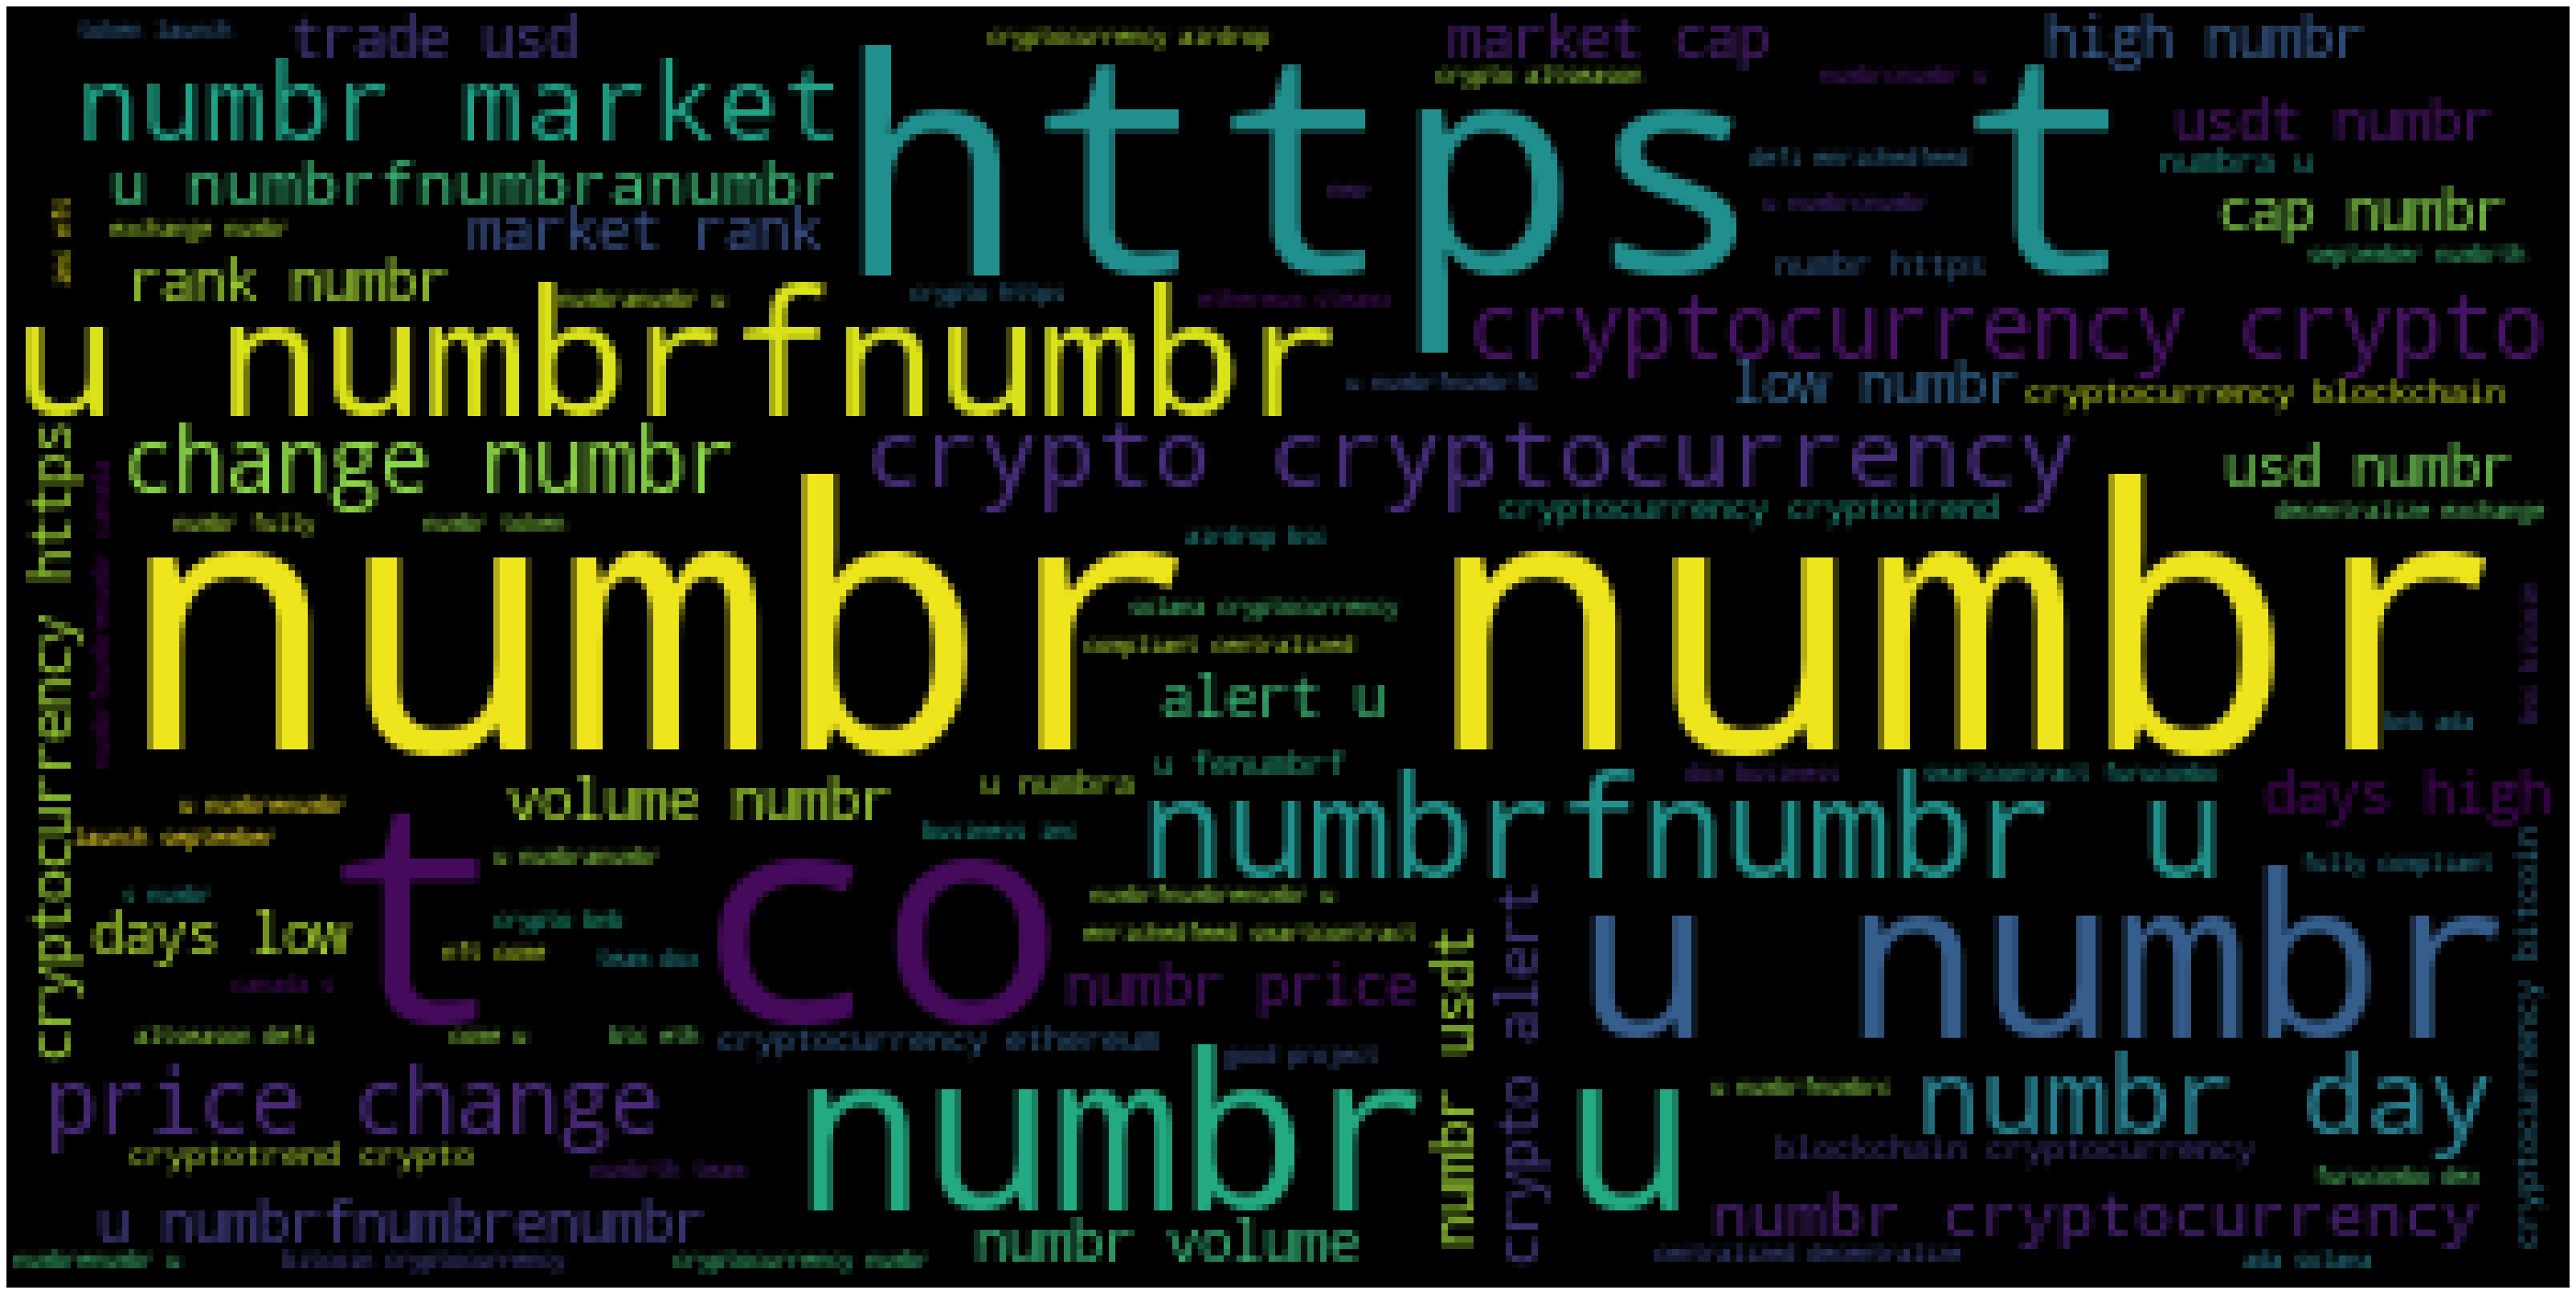

In [22]:
wordcloud = WordCloud().generate(wordcloud_text)
# Open a plot of the generated image.
#figure(figsize = (20,2))
plt.figure(figsize=(50,40))
plt.imshow(wordcloud)
           #, aspect="auto")
plt.axis("off")